## Population in Ireland: Where are we heading to?

- Observe the population growth/decline in Ireland from 1960 to 2022.
- Analyse the correlation between the number of births, deaths and marriages, been determining factors in population growth/decline.
- Find an optimal machine learning model that makes projections into the future regarding Ireland’s population.
- Analyse our results in order to make conclusions concerning Ireland’s population stability.


#### Data source
The dataset for this analysis is going to be gotten from the Central Statistics Office (CSO), Ireland. The CSO is responsible for collection, compilation, extraction and dissemination of high-quality data used for analysis of economic and social important topics.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Total Births, Deaths and Marriages Registered.csv')
df.head(-5)

,Statistic Label,Quarter,State,UNIT,VALUE
0,Marriages Registered,1960Q1,State,Number,2987.0
1,Marriages Registered,1960Q2,State,Number,3501.0
2,Marriages Registered,1960Q3,State,Number,5900.0
3,Marriages Registered,1960Q4,State,Number,3106.0
4,Marriages Registered,1961Q1,State,Number,2179.0
...,...,...,...,...,...
4544,Average age of mothers giving birth,2020Q4,State,Number,NaN
4545,Average age of mothers giving birth,2021Q1,State,Number,NaN
4546,Average age of mothers giving birth,2021Q2,State,Number,NaN
4547,Average age of mothers giving birth,2021Q3,State,Number,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4554 entries, 0 to 4553
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  4554 non-null   object 
 1   Quarter          4554 non-null   object 
 2   State            4554 non-null   object 
 3   UNIT             4554 non-null   object 
 4   VALUE            1826 non-null   float64
dtypes: float64(1), object(4)
memory usage: 178.0+ KB


In [4]:
df.describe()

,VALUE
count,1826.000000
mean,3977.795016
std,5587.558500
min,0.000000
25%,7.825000
50%,20.050000
75%,7348.250000
max,19950.000000


In [5]:
df.isnull().mean()*100 # Porcentage of missing data

Statistic Label     0.000000
Quarter             0.000000
State               0.000000
UNIT                0.000000
VALUE              59.903382
dtype: float64

In [6]:
df['Statistic Label'].unique()

array(['Marriages Registered',
       'Marriage Rate Registered per 1000 Estimated Population',
       'Deaths Registered',
       'Death Rate Registered per 1000 Estimated Population',
       'Deaths of Infants under 1 Year Registered per 1000 Births',
       'Births Registered',
       'Birth Rate Registered per 1000 Estimated Population',
       'Opposite sex marriages', 'Same sex marriages',
       'Civil partnerships', 'Births registered that were first births',
       'Births registered outside marriage', 'Opposite sex marriage rate',
       'Same sex marriage rate', 'Civil partnership marriage rate',
       'Percentage of first births registered',
       'Percentage of births registered outside marriage',
       'Average age of mothers giving birth'], dtype=object)

In [7]:
df['Quarter'].unique()

array(['1960Q1', '1960Q2', '1960Q3', '1960Q4', '1961Q1', '1961Q2',
       '1961Q3', '1961Q4', '1962Q1', '1962Q2', '1962Q3', '1962Q4',
       '1963Q1', '1963Q2', '1963Q3', '1963Q4', '1964Q1', '1964Q2',
       '1964Q3', '1964Q4', '1965Q1', '1965Q2', '1965Q3', '1965Q4',
       '1966Q1', '1966Q2', '1966Q3', '1966Q4', '1967Q1', '1967Q2',
       '1967Q3', '1967Q4', '1968Q1', '1968Q2', '1968Q3', '1968Q4',
       '1969Q1', '1969Q2', '1969Q3', '1969Q4', '1970Q1', '1970Q2',
       '1970Q3', '1970Q4', '1971Q1', '1971Q2', '1971Q3', '1971Q4',
       '1972Q1', '1972Q2', '1972Q3', '1972Q4', '1973Q1', '1973Q2',
       '1973Q3', '1973Q4', '1974Q1', '1974Q2', '1974Q3', '1974Q4',
       '1975Q1', '1975Q2', '1975Q3', '1975Q4', '1976Q1', '1976Q2',
       '1976Q3', '1976Q4', '1977Q1', '1977Q2', '1977Q3', '1977Q4',
       '1978Q1', '1978Q2', '1978Q3', '1978Q4', '1979Q1', '1979Q2',
       '1979Q3', '1979Q4', '1980Q1', '1980Q2', '1980Q3', '1980Q4',
       '1981Q1', '1981Q2', '1981Q3', '1981Q4', '1982Q1', '1982

In [8]:
df['State'].unique()

array(['State'], dtype=object)

In [9]:
df.drop(columns='State', inplace=True)
df.head()

,Statistic Label,Quarter,UNIT,VALUE
0,Marriages Registered,1960Q1,Number,2987.0
1,Marriages Registered,1960Q2,Number,3501.0
2,Marriages Registered,1960Q3,Number,5900.0
3,Marriages Registered,1960Q4,Number,3106.0
4,Marriages Registered,1961Q1,Number,2179.0


In [10]:
df['UNIT'].unique()

array(['Number', '%'], dtype=object)

In [11]:
df = df[df['UNIT'].str.contains('%')==False]
df['UNIT'].unique()

array(['Number'], dtype=object)

In [12]:
df.drop(columns='UNIT', inplace=True)
df.head()

,Statistic Label,Quarter,VALUE
0,Marriages Registered,1960Q1,2987.0
1,Marriages Registered,1960Q2,3501.0
2,Marriages Registered,1960Q3,5900.0
3,Marriages Registered,1960Q4,3106.0
4,Marriages Registered,1961Q1,2179.0


In [13]:
df['label_lc'] = df['Statistic Label'].apply(lambda x: ' '.join(x.lower() for x in x.split())) # put everything in lower case
df[['label_lc']].head()

,label_lc
0,marriages registered
1,marriages registered
2,marriages registered
3,marriages registered
4,marriages registered


In [14]:
df.rename(columns={"Quarter": "year"}, inplace=True)
df.rename(columns={"VALUE": "value"}, inplace=True)

In [15]:
# Since we are analysing the population change per year, we do not need the values per quater, therefore we will remove
# Q1, Q2, Q3 and Q4 from the Quater column and then we will be able to asign the column as a integer.

df['year'] = df['year'].str[:-2] # Remove the 2 last characters
df['year']

0       1960
1       1960
2       1960
3       1960
4       1961
        ... 
4549    2022
4550    2022
4551    2022
4552    2022
4553    2023
Name: year, Length: 3289, dtype: object

In [16]:
df['year'] = df['year'].astype(int) # Assign Quarter column as a type integer
df.dtypes

Statistic Label     object
year                 int32
value              float64
label_lc            object
dtype: object

In [17]:
df_group = df.groupby(['year','label_lc'])['value'].sum()
df_group.head(20)

year  label_lc                                                 
1960  average age of mothers giving birth                              0.0
      birth rate registered per 1000 estimated population             85.7
      births registered                                            60730.0
      births registered outside marriage                               0.0
      births registered that were first births                         0.0
      civil partnerships                                               0.0
      death rate registered per 1000 estimated population             45.9
      deaths of infants under 1 year registered per 1000 births      117.5
      deaths registered                                            32658.0
      marriage rate registered per 1000 estimated population          21.8
      marriages registered                                         15494.0
      opposite sex marriages                                           0.0
      same sex marriages            

In [18]:
df = df[df['label_lc'].str.contains('average age of mothers giving birth')==False]
df = df[df['label_lc'].str.contains('births registered outside marriage')==False]
df = df[df['label_lc'].str.contains('births registered that were first births')==False]
df = df[df['label_lc'].str.contains('civil partnerships')==False]
df = df[df['label_lc'].str.contains('opposite sex marriages')==False]
df = df[df['label_lc'].str.contains('same sex marriages')==False]
df = df[df['label_lc'].str.contains('birth rate registered per 1000 estimated population')==False]
df = df[df['label_lc'].str.contains('death rate registered per 1000 estimated population')==False]
df = df[df['label_lc'].str.contains('deaths of infants under 1 year registered per 1000 births')==False]
df = df[df['label_lc'].str.contains('marriage rate registered per 1000 estimated population')==False]

df['label_lc'].unique()

array(['marriages registered', 'deaths registered', 'births registered'],
      dtype=object)

In [19]:
df['value'] = df['value'].astype(int) # Assign VALUE column as a type integer, since a birth or death can only be an integer.
df.dtypes

Statistic Label    object
year                int32
value               int32
label_lc           object
dtype: object

In [20]:
df = df.query('year != 2023')
df['year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [21]:
df.head()

,Statistic Label,year,value,label_lc
0,Marriages Registered,1960,2987,marriages registered
1,Marriages Registered,1960,3501,marriages registered
2,Marriages Registered,1960,5900,marriages registered
3,Marriages Registered,1960,3106,marriages registered
4,Marriages Registered,1961,2179,marriages registered


In [22]:
df.drop(columns='Statistic Label', inplace=True)
df.head()

,year,value,label_lc
0,1960,2987,marriages registered
1,1960,3501,marriages registered
2,1960,5900,marriages registered
3,1960,3106,marriages registered
4,1961,2179,marriages registered


In [23]:
df_group = df.groupby(['year','label_lc'], as_index=False)['value'].sum()
df_group.head(20)

,year,label_lc,value
0,1960,births registered,60730
1,1960,deaths registered,32658
2,1960,marriages registered,15494
3,1961,births registered,59826
4,1961,deaths registered,34548
5,1961,marriages registered,15140
6,1962,births registered,61611
7,1962,deaths registered,33643
8,1962,marriages registered,15409
9,1963,births registered,62966


In [24]:
df_group['label_lc'].replace('births registered','births_registered', inplace=True)
df_group['label_lc'].replace('deaths registered','deaths_registered', inplace=True)
df_group['label_lc'].replace('marriages registered','marriages_registered', inplace=True)
df_group.head()

,year,label_lc,value
0,1960,births_registered,60730
1,1960,deaths_registered,32658
2,1960,marriages_registered,15494
3,1961,births_registered,59826
4,1961,deaths_registered,34548


In [25]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      189 non-null    int32 
 1   label_lc  189 non-null    object
 2   value     189 non-null    int32 
dtypes: int32(2), object(1)
memory usage: 3.1+ KB


In [26]:
df_group.isnull().mean()*100 # Porcentage of missing data

year        0.0
label_lc    0.0
value       0.0
dtype: float64

In [27]:
df_births = pd.DataFrame() # Create an empty data frame to store the births values
df_deaths = pd.DataFrame() # Create an empty data frame to store the deaths values
df_marriages = pd.DataFrame() # Create an empty data frame to store the marriages values

In [28]:
df_births = df_group.loc[df_group['label_lc'] == 'births_registered']
df_deaths = df_group.loc[df_group['label_lc'] == 'deaths_registered']
df_marriages = df_group.loc[df_group['label_lc'] == 'marriages_registered']

In [29]:
df_births.rename(columns={"value": "births"}, inplace=True)
df_births.head()

,year,label_lc,births
0,1960,births_registered,60730
3,1961,births_registered,59826
6,1962,births_registered,61611
9,1963,births_registered,62966
12,1964,births_registered,64008


In [30]:
df_births.drop(columns='label_lc', inplace=True) # drop the label column since we already have our 'births' feature
df_births.head()

,year,births
0,1960,60730
3,1961,59826
6,1962,61611
9,1963,62966
12,1964,64008


In [31]:
df_deaths.rename(columns={"value": "deaths"}, inplace=True)
df_deaths.head()

,year,label_lc,deaths
1,1960,deaths_registered,32658
4,1961,deaths_registered,34548
7,1962,deaths_registered,33643
10,1963,deaths_registered,33558
13,1964,deaths_registered,32473


In [32]:
df_deaths.drop(columns='label_lc', inplace=True) # drop the label column since we already have our 'deaths' feature
df_deaths.head()

,year,deaths
1,1960,32658
4,1961,34548
7,1962,33643
10,1963,33558
13,1964,32473


In [33]:
df_marriages.rename(columns={"value": "marriages"}, inplace=True)
df_marriages.head()

,year,label_lc,marriages
2,1960,marriages_registered,15494
5,1961,marriages_registered,15140
8,1962,marriages_registered,15409
11,1963,marriages_registered,15298
14,1964,marriages_registered,15941


In [34]:
df_marriages.drop(columns='label_lc', inplace=True) # drop the label column since we already have our 'marriages' feature
df_marriages.head()

,year,marriages
2,1960,15494
5,1961,15140
8,1962,15409
11,1963,15298
14,1964,15941


In [35]:
df_new1 = pd.merge(df_births, df_deaths, how='inner', on='year')
df_new1.head()

,year,births,deaths
0,1960,60730,32658
1,1961,59826,34548
2,1962,61611,33643
3,1963,62966,33558
4,1964,64008,32473


In [36]:
df_new = pd.merge(df_new1, df_marriages, how='inner', on='year')
df_new.head()

,year,births,deaths,marriages
0,1960,60730,32658,15494
1,1961,59826,34548,15140
2,1962,61611,33643,15409
3,1963,62966,33558,15298
4,1964,64008,32473,15941


In [37]:
df_new.shape

(63, 4)

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       63 non-null     int32
 1   births     63 non-null     int32
 2   deaths     63 non-null     int32
 3   marriages  63 non-null     int32
dtypes: int32(4)
memory usage: 1.5 KB


In [39]:
df_new.describe()

,year,births,deaths,marriages
count,63.000000,63.000000,63.000000,63.000000
mean,1991.000000,62493.904762,31554.603175,19263.698413
std,18.330303,7278.289290,1970.121419,2629.056360
min,1960.000000,47929.000000,27441.000000,9533.000000
25%,1975.500000,58162.500000,30437.000000,17335.500000
50%,1991.000000,62143.000000,31605.000000,19863.000000
75%,2006.500000,67872.000000,33053.000000,21142.500000
max,2022.000000,75724.000000,35477.000000,23061.000000


In [40]:
df_new.isnull().mean()*100 # Porcentage of missing data

year         0.0
births       0.0
deaths       0.0
marriages    0.0
dtype: float64

In [41]:
# Source: https://population.un.org/wpp/Download/ (United Nations)
df_target = pd.read_csv('population-with-un-projections.csv')
df_target.head()

,Entity,Code,Year,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,7480464.0,NaN
1,Afghanistan,AFG,1951,7571542.0,NaN
2,Afghanistan,AFG,1952,7667534.0,NaN
3,Afghanistan,AFG,1953,7764549.0,NaN
4,Afghanistan,AFG,1954,7864289.0,NaN


"Medium scenario projection: in projecting future levels of fertility and mortality, probabilistic methods were used to reflect the uncertainty of the projections based on the historical variability of changes in each variable. The method takes into account the past experience of each country, while also reflecting uncertainty about future changes based on the past experience of other countries under similar conditions.  The medium scenario projection corresponds to the median of several thousand distinct trajectories of each demographic component derived using the probabilistic model of the variability in changes over time. Prediction intervals reflect the spread in the distribution of outcomes across the projected trajectories and thus provide an assessment of the uncertainty inherent in the medium scenario projection." (United Nations, 2022)

In [42]:
df_target['Entity'].unique()

array(['Afghanistan', 'Africa (UN)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia (UN)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial

In [43]:
df_target['Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH',
       'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR',
       'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE',
       'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN',
       'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN',
       'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR',
       'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI',
       'MY

In [44]:
df_target = df_target[df_target['Code'].str.contains('IRL')==True]
df_target.head(-5)

,Entity,Code,Year,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium
15704,Ireland,IRL,1950,2906608.0,NaN
15705,Ireland,IRL,1951,2924713.0,NaN
15706,Ireland,IRL,1952,2929379.0,NaN
15707,Ireland,IRL,1953,2917036.0,NaN
15708,Ireland,IRL,1954,2902783.0,NaN
...,...,...,...,...,...
15845,Ireland,IRL,2091,NaN,5764347.0
15846,Ireland,IRL,2092,NaN,5762042.0
15847,Ireland,IRL,2093,NaN,5759071.0
15848,Ireland,IRL,2094,NaN,5755452.0


In [45]:
df_target.shape

(151, 5)

In [46]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 15704 to 15854
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 151 non-null    object 
 1   Code                                                   151 non-null    object 
 2   Year                                                   151 non-null    int64  
 3   Population - Sex: all - Age: all - Variant: estimates  72 non-null     float64
 4   Population - Sex: all - Age: all - Variant: medium     79 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.1+ KB


In [47]:
df_target.isnull().mean()*100 # Porcentage of missing data

Entity                                                    0.000000
Code                                                      0.000000
Year                                                      0.000000
Population - Sex: all - Age: all - Variant: estimates    52.317881
Population - Sex: all - Age: all - Variant: medium       47.682119
dtype: float64

In [48]:
df_target = df_target[df_target['Year'] >= 1960]
df_target = df_target[df_target['Year'] <= 2022]
df_target = df_target.drop(columns =['Entity','Code'], axis=1)
df_target.columns= ['year', 'pop', 'pop1']
df_target.head()

,year,pop,pop1
15714,1960,2811075.0,NaN
15715,1961,2807012.0,NaN
15716,1962,2813072.0,NaN
15717,1963,2824097.0,NaN
15718,1964,2837439.0,NaN


In [49]:
df_target.fillna(0,inplace=True)
df_target['population'] = df_target['pop']+df_target['pop1']
df_target['population'] = df_target['population'].astype('int')
df_target.head()

,year,pop,pop1,population
15714,1960,2811075.0,0.0,2811075
15715,1961,2807012.0,0.0,2807012
15716,1962,2813072.0,0.0,2813072
15717,1963,2824097.0,0.0,2824097
15718,1964,2837439.0,0.0,2837439


In [50]:
df_target = df_target.drop(columns =['pop','pop1'], axis=1)
df_target.shape

(63, 2)

In [51]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 15714 to 15776
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        63 non-null     int64
 1   population  63 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 1.2 KB


In [52]:
df_target.describe()

,year,population
count,63.000000,6.300000e+01
mean,1991.000000,3.703371e+06
std,18.330303,6.743050e+05
min,1960.000000,2.807012e+06
25%,1975.500000,3.181838e+06
50%,1991.000000,3.515672e+06
75%,2006.500000,4.297325e+06
max,2022.000000,5.023108e+06


In [53]:
df_target
df_target.head(10)

,year,population
15714,1960,2811075
15715,1961,2807012
15716,1962,2813072
15717,1963,2824097
15718,1964,2837439
15719,1965,2852404
15720,1966,2867008
15721,1967,2882744
15722,1968,2899653
15723,1969,2917193


In [54]:
df_new = pd.merge(df_new, df_target, how='inner', on='year')
df_new.head()

,year,births,deaths,marriages,population
0,1960,60730,32658,15494,2811075
1,1961,59826,34548,15140,2807012
2,1962,61611,33643,15409,2813072
3,1963,62966,33558,15298,2824097
4,1964,64008,32473,15941,2837439


In [55]:
df_new.isnull().mean()*100 # Porcentage of missing data

year          0.0
births        0.0
deaths        0.0
marriages     0.0
population    0.0
dtype: float64

In [56]:
df_new.shape

(63, 5)

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        63 non-null     int32
 1   births      63 non-null     int32
 2   deaths      63 non-null     int32
 3   marriages   63 non-null     int32
 4   population  63 non-null     int32
dtypes: int32(5)
memory usage: 1.7 KB


In [58]:
df_new.describe()

,year,births,deaths,marriages,population
count,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,1991.000000,62493.904762,31554.603175,19263.698413,3.703371e+06
std,18.330303,7278.289290,1970.121419,2629.056360,6.743050e+05
min,1960.000000,47929.000000,27441.000000,9533.000000,2.807012e+06
25%,1975.500000,58162.500000,30437.000000,17335.500000,3.181838e+06
50%,1991.000000,62143.000000,31605.000000,19863.000000,3.515672e+06
75%,2006.500000,67872.000000,33053.000000,21142.500000,4.297325e+06
max,2022.000000,75724.000000,35477.000000,23061.000000,5.023108e+06


### Machine Learning models

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = df_new.iloc[:,0:4]
y = df_new['population']

In [60]:
X.shape, y.shape

((63, 4), (63,))

In [61]:
#y = y.reshape(-1,1)
#y.shape

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 4), (19, 4), (44,), (19,))

### Random Forest Regressor 1:

In [63]:
RF = RandomForestRegressor(n_estimators=50, max_depth=3)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(y_test, y_pred)

4     2837439
31    3504806
27    3513702
22    3451220
29    3483316
59    4896021
41    3829019
14    3110101
25    3505781
24    3490937
6     2867008
20    3391393
7     2882744
12    3013995
26    3515672
11    2969402
49    4499797
16    3205754
17    3254661
Name: population, dtype: int32 [2870172.04907071 3503151.0651976  3499585.45376903 3456716.04569271
 3503151.0651976  4844610.15007143 3772405.05072711 3067038.57547619
 3471059.19779589 3474714.06997843 2860184.71464214 3450884.85193332
 2873723.45202309 3067038.57547619 3476074.878907   3014219.24992352
 4510702.72055345 3208622.81832251 3357107.28898612]


In [64]:
#mean_squared_error(y_test, y_pred)
#RF.score(y_test, y_pred)
#MSE = np.square(np.subtract(y_test, y_pred)).mean()
#MSE
r2_score(y_test, y_pred)

0.9937193546049208

### Results Random Forest Regressor 1:

- 90% training with n_estimators=50 and max_depth=3:

r2 score: 0.989

- 80% training with n_estimators=50 and max_depth=3:

r2 score: 0.995

- 70% training with n_estimators=50 and max_depth=3:

r2 score: 0.984

In [65]:
RFR1 = [0.989, 0.995, 0.984]
RFR1 = pd.DataFrame(RFR1)
RFR1.columns = ['R2_score_RFR1']
RFR1

,R2_score_RFR1
0,0.989
1,0.995
2,0.984


### Random Forest Regressor 2:

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 4), (19, 4), (44,), (19,))

In [67]:
RF = RandomForestRegressor(n_estimators=100, max_depth=3)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(y_test, y_pred)

4     2837439
31    3504806
27    3513702
22    3451220
29    3483316
59    4896021
41    3829019
14    3110101
25    3505781
24    3490937
6     2867008
20    3391393
7     2882744
12    3013995
26    3515672
11    2969402
49    4499797
16    3205754
17    3254661
Name: population, dtype: int32 [2902562.19106474 3513634.59510176 3491855.0133119  3430752.84640209
 3509066.253651   4847274.94223052 3788713.52529933 3106400.18865429
 3439357.11900346 3474215.25705676 2864655.68945876 3431275.41440209
 2912135.05302902 3070663.34056266 3444678.35874705 3064363.59611308
 4519617.27227975 3143590.55641145 3305495.05813091]


In [68]:
r2_score(y_test, y_pred)

0.9918068890884741

### Results Random Forest Regressor 2:

- 90% training with n_estimators=100 and max_depth=3:

r2 score: 0.994

- 80% training with n_estimators=100 and max_depth=3:

r2 score: 0.995

- 70% training with n_estimators=100 and max_depth=3:

r2 score: 0.991

In [69]:
RFR2 = [0.994, 0.995, 0.991]
RFR2 = pd.DataFrame(RFR2)
RFR2.columns = ['R2_score_RFR2']
RFR2

,R2_score_RFR2
0,0.994
1,0.995
2,0.991


### Random Forest Regressor R2_score comparation (RFR1 v RFR2):

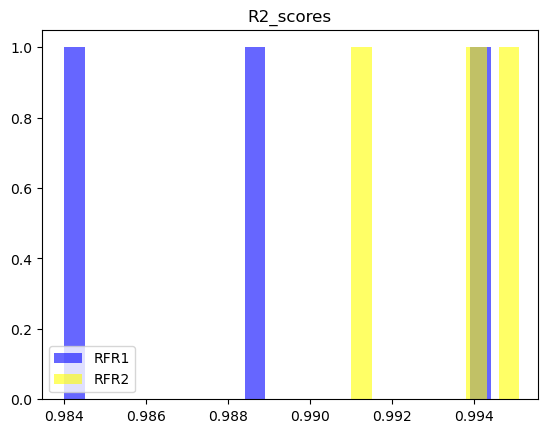

In [70]:
plt.hist(RFR1, label='RFR1', width=.0005, alpha=.6, color= 'blue')
plt.hist(RFR2, label='RFR2', width=.0005, alpha=.6, color= 'yellow')
plt.legend(loc='lower left')
plt.title('R2_scores', loc='center')
plt.show()

###  Random Forest Regressor 3:
Hyperparameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 4), (7, 4), (56,), (7,))

In [75]:
tuning_grid = {
    'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9]  
}

In [76]:
grid_search = GridSearchCV(RandomForestRegressor(), 
                           param_grid=tuning_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

KeyboardInterrupt: 

In [ ]:
RF = RandomForestRegressor(n_estimators=20, max_depth=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)